# 2 - Statistical Analysis

## Victor Jose Novaes Pires

### 2019-02-26

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Import dataframe

In [1]:
import pandas as pd
df = pd.read_csv('megasena.csv', index_col=0, parse_dates=[1])
df.head()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
1,1996-03-11,41,5,4,52,30,33
2,1996-03-18,9,39,37,49,43,41
3,1996-03-25,36,30,10,11,29,47
4,1996-04-01,6,59,42,27,1,5
5,1996-04-08,1,19,46,6,16,2


In [2]:
df.tail()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
2123,2019-02-09,47,59,14,56,50,15
2124,2019-02-13,31,20,47,43,2,11
2125,2019-02-16,44,1,31,53,46,58
2126,2019-02-20,58,39,27,7,24,12
2127,2019-02-23,7,46,28,30,44,1


## Statistical Analysis

### How many times each number was drawn on each ball?

In [3]:
num_ball = df.iloc[:, 1:7].apply(pd.Series.value_counts, dropna=False, ascending=True)
num_ball

,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
1,34,38,40,41,28,30
2,42,36,36,31,37,35
3,27,40,29,24,39,39
4,49,31,44,32,37,42
5,37,54,32,43,33,42
6,39,38,32,31,40,39
7,38,31,29,41,31,30
8,29,43,37,33,33,38
9,33,29,25,34,37,31
10,41,45,34,37,45,42


#### Each cell has the count of how many times each number was drawn on each ball.

In [4]:
num_ball.describe()

,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,35.450000,35.450000,35.450000,35.450000,35.450000,35.450000
std,6.082554,6.225767,6.195748,5.422567,5.321606,5.140154
min,22.000000,23.000000,23.000000,24.000000,21.000000,27.000000
25%,31.750000,31.000000,31.000000,31.000000,32.000000,31.000000
50%,35.000000,35.500000,35.000000,35.000000,35.000000,35.000000
75%,39.250000,39.250000,39.000000,39.000000,39.000000,39.000000
max,51.000000,54.000000,51.000000,52.000000,45.000000,50.000000


#### Again, the statistics above are for the count of how many times each number was drawn on each ball.

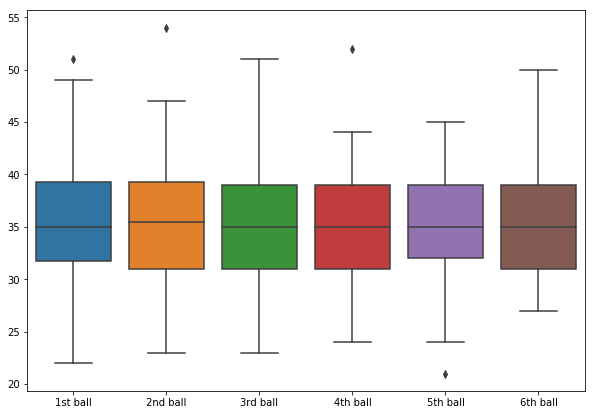

In [5]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 7])
sns.boxplot(data=num_ball)
plt.show()

### How many times each number was drawn in total?

In [6]:
all_numbers = pd.concat([df[col] for col in df.iloc[:, 1:7].columns], axis=0)

# Each drawing has six balls
len(all_numbers) == len(df)*6

True

In [7]:
num_stats = all_numbers.value_counts().sort_index().to_frame()
num_stats.rename(columns={0: 'Times drawn'}, inplace=True)
num_stats.index.rename('Number', inplace=True)
num_stats.head()

,Times drawn
Number,
1,211
2,217
3,198
4,235
5,241


In [8]:
m = num_stats['Times drawn'].mean()
print(f"Mean of total times drawn: {m:.2f}")

Mean of total times drawn: 212.70


In [9]:
sd = num_stats['Times drawn'].std()
print(f"Standard deviation of total times drawn: {sd:.2f}")

Standard deviation of total times drawn: 15.00


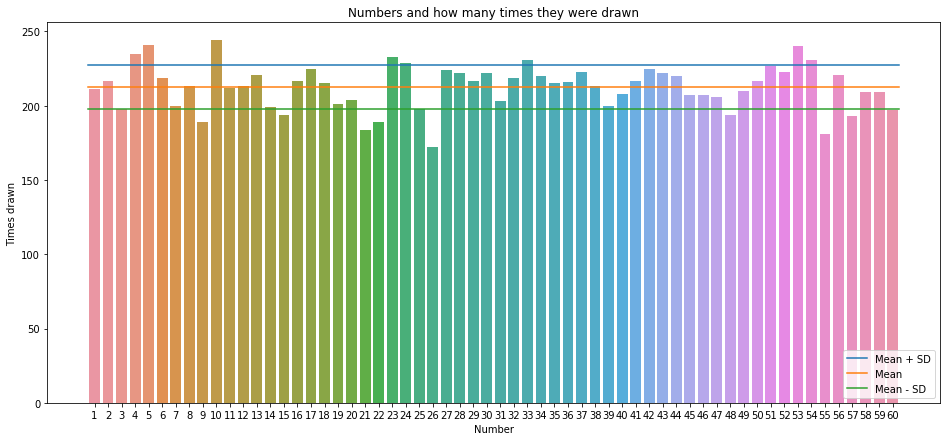

In [10]:
plt.figure(figsize=[16, 7])
ax = sns.barplot(data=num_stats.T)
x = ax.get_xlim()
sns.lineplot(x=x, y=[m + sd]*2, label="Mean + SD")
sns.lineplot(x=x, y=[m]*2, label="Mean")
sns.lineplot(x=x, y=[m - sd]*2, label="Mean - SD")
ax.set_title('Numbers and how many times they were drawn')
ax.set_xlabel('Number')
ax.set_ylabel('Times drawn')
ax.legend(loc=4)
plt.show()

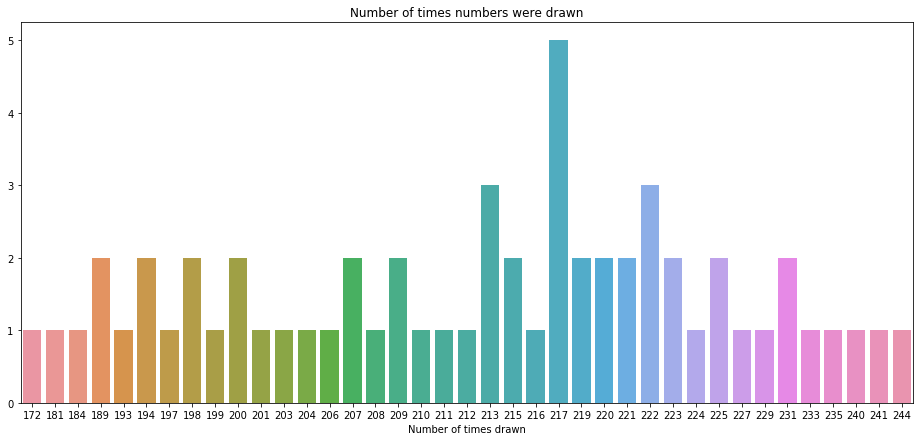

In [11]:
plt.figure(figsize=[16, 7])
ax = sns.barplot(data=num_stats['Times drawn'].value_counts().sort_index().to_frame().T)
ax.set_title('Number of times numbers were drawn')
ax.set_xlabel('Number of times drawn')
plt.show()

In [12]:
num_stats.describe()[1:].rename(columns={0: 'Statistics'}).T

,mean,std,min,25%,50%,75%,max
Times drawn,212.7,15.000904,172.0,202.5,215.0,222.0,244.0


### Statistics for each number

In [13]:
for number in range(1, 61):
    times_drawn = num_stats['Times drawn'].loc[number]
    percent = times_drawn / len(all_numbers) * 100
    print(f"{number:02d} was drawn {times_drawn} times ({percent:.2f}%)", end=" ")

    drawings = times_drawn - m
    print(f"[Average", end=" ")
    if drawings >= 0:
        print("+", end=" ")
    else:
        print("-", end=" ")
    print(f"{abs(drawings):5.2f} drawings]", end=" ")

    deviation = abs(drawings/sd)
    if deviation <= 1:
        print("[<= 1 SD   ]")
    elif deviation <= 2:
        print("[<= 2 SD!  ]")
    else:
        print("[ > 2 SD!!!]")

01 was drawn 211 times (1.65%) [Average -  1.70 drawings] [<= 1 SD   ]
02 was drawn 217 times (1.70%) [Average +  4.30 drawings] [<= 1 SD   ]
03 was drawn 198 times (1.55%) [Average - 14.70 drawings] [<= 1 SD   ]
04 was drawn 235 times (1.84%) [Average + 22.30 drawings] [<= 2 SD!  ]
05 was drawn 241 times (1.89%) [Average + 28.30 drawings] [<= 2 SD!  ]
06 was drawn 219 times (1.72%) [Average +  6.30 drawings] [<= 1 SD   ]
07 was drawn 200 times (1.57%) [Average - 12.70 drawings] [<= 1 SD   ]
08 was drawn 213 times (1.67%) [Average +  0.30 drawings] [<= 1 SD   ]
09 was drawn 189 times (1.48%) [Average - 23.70 drawings] [<= 2 SD!  ]
10 was drawn 244 times (1.91%) [Average + 31.30 drawings] [ > 2 SD!!!]
11 was drawn 212 times (1.66%) [Average -  0.70 drawings] [<= 1 SD   ]
12 was drawn 213 times (1.67%) [Average +  0.30 drawings] [<= 1 SD   ]
13 was drawn 221 times (1.73%) [Average +  8.30 drawings] [<= 1 SD   ]
14 was drawn 199 times (1.56%) [Average - 13.70 drawings] [<= 1 SD   ]
15 was

### All numbers sorted by number of times drawn

In [14]:
popularity = {}
for number, times_drawn in zip(all_numbers.value_counts().index, all_numbers.value_counts().values):
    if times_drawn in popularity.keys():
        popularity[times_drawn].append(number)
    else:
        popularity[times_drawn] = [number]

popularity = pd.DataFrame([[k] + popularity[k] for k in popularity.keys()]).fillna(0)
popularity.rename(columns={k: v for k, v in zip(popularity.columns,
                      ['Times drawn'] + [f"Number {i}" for i in popularity.columns[1:]])},
                 inplace=True)
popularity.index.set_names('Popularity', inplace=True)
popularity.index += 1
popularity

,Times drawn,Number 1,Number 2,Number 3,Number 4,Number 5
Popularity,,,,,,
1,244,10,0.0,0.0,0.0,0.0
2,241,5,0.0,0.0,0.0,0.0
3,240,53,0.0,0.0,0.0,0.0
4,235,4,0.0,0.0,0.0,0.0
5,233,23,0.0,0.0,0.0,0.0
6,231,33,54.0,0.0,0.0,0.0
7,229,24,0.0,0.0,0.0,0.0
8,227,51,0.0,0.0,0.0,0.0
9,225,17,42.0,0.0,0.0,0.0


### Statistics for the last five drawings

In [15]:
def print_stats(drawing):
    print(f">>> Drawing {drawing.index.values[0]} on {drawing.Date.dt.strftime('%Y-%m-%d').values[0]}:")
    balls = drawing.columns[1:]
    numbers = drawing.iloc[:, 1:7].iloc[-1]
    for ball, number in zip(balls, numbers):
        times_drawn = num_stats['Times drawn'].loc[number]
        print(f"{ball}: {number:02d}; Drawn {times_drawn} times;", end=" ")

        print(f"In last drawing: ", end="")
        index = drawing.index.values[0]
        if df.iloc[index - 2].isin([number]).sum():
            print("Yes!", end=" ")
        else:
            print("No. ", end=" ")

        popularity_index = popularity.index[(popularity.iloc[:, 1:] == number).sum(axis=1) == 1].values[0]
        print(f"Popularity: {popularity_index:2d}", end="")
        if popularity.iloc[:10, 1:].isin([number]).sum().sum():
            print(" (top 10)")
        elif popularity.iloc[-10:, 1:].isin([number]).sum().sum():
            print(" (bottom 10)")
        else:
            print()

In [16]:
def plot_stats(drawing):
    numbers = {number: num_stats['Times drawn'].loc[number] for number in drawing.iloc[:, 1:7].iloc[-1]}
    plt.figure(figsize=[16, 7])
    ax = sns.barplot(data=pd.DataFrame(numbers, index=[0]))
    x = ax.get_xlim()
    sns.lineplot(x=x, y=[m + sd]*2, label="Mean + SD")
    sns.lineplot(x=x, y=[m]*2, label="Mean")
    sns.lineplot(x=x, y=[m - sd]*2, label="Mean - SD")
    ax.set_title(f"Drawing {drawing.index.values[0]} on {drawing.Date.dt.strftime('%Y-%m-%d').values[0]}")
    ax.set_xlabel('Number')
    ax.set_ylabel('Times drawn')
    ax.legend(loc=4)
    plt.show()
    print('\n'*3)

In [17]:
df.tail()

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
2123,2019-02-09,47,59,14,56,50,15
2124,2019-02-13,31,20,47,43,2,11
2125,2019-02-16,44,1,31,53,46,58
2126,2019-02-20,58,39,27,7,24,12
2127,2019-02-23,7,46,28,30,44,1


>>> Drawing 2123 on 2019-02-09:
1st ball: 47; Drawn 206 times; In last drawing: No.  Popularity: 26
2nd ball: 59; Drawn 209 times; In last drawing: No.  Popularity: 23
3rd ball: 14; Drawn 199 times; In last drawing: No.  Popularity: 31 (bottom 10)
4th ball: 56; Drawn 221 times; In last drawing: No.  Popularity: 13
5th ball: 50; Drawn 217 times; In last drawing: No.  Popularity: 16
6th ball: 15; Drawn 194 times; In last drawing: Yes! Popularity: 34 (bottom 10)


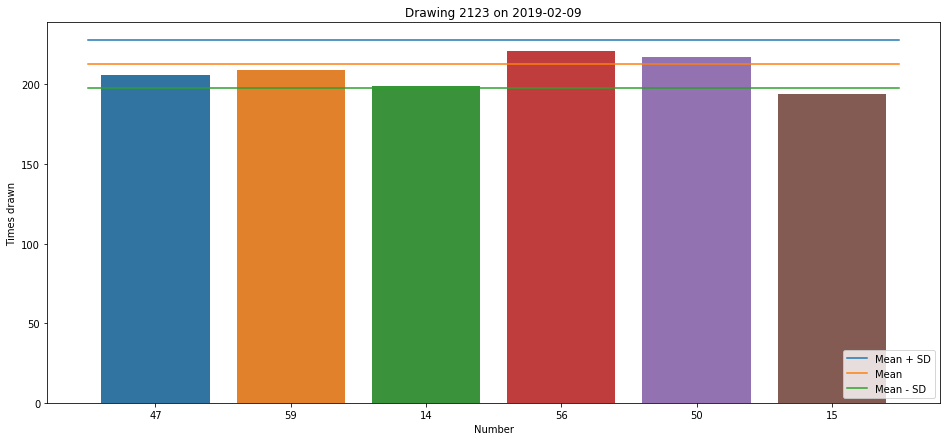





>>> Drawing 2124 on 2019-02-13:
1st ball: 31; Drawn 203 times; In last drawing: No.  Popularity: 28
2nd ball: 20; Drawn 204 times; In last drawing: No.  Popularity: 27
3rd ball: 47; Drawn 206 times; In last drawing: Yes! Popularity: 26
4th ball: 43; Drawn 222 times; In last drawing: No.  Popularity: 12
5th ball: 02; Drawn 217 times; In last drawing: No.  Popularity: 16
6th ball: 11; Drawn 212 times; In last drawing: No.  Popularity: 20


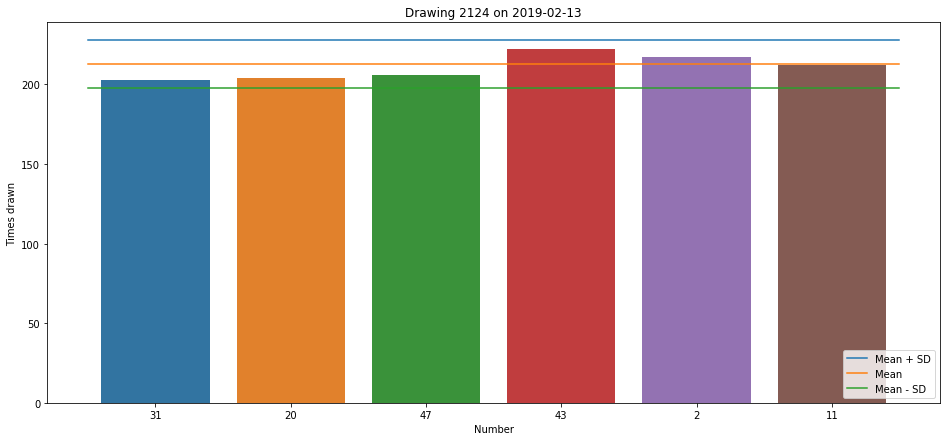





>>> Drawing 2125 on 2019-02-16:
1st ball: 44; Drawn 220 times; In last drawing: No.  Popularity: 14
2nd ball: 01; Drawn 211 times; In last drawing: No.  Popularity: 21
3rd ball: 31; Drawn 203 times; In last drawing: Yes! Popularity: 28
4th ball: 53; Drawn 240 times; In last drawing: No.  Popularity:  3 (top 10)
5th ball: 46; Drawn 207 times; In last drawing: No.  Popularity: 25
6th ball: 58; Drawn 209 times; In last drawing: No.  Popularity: 23


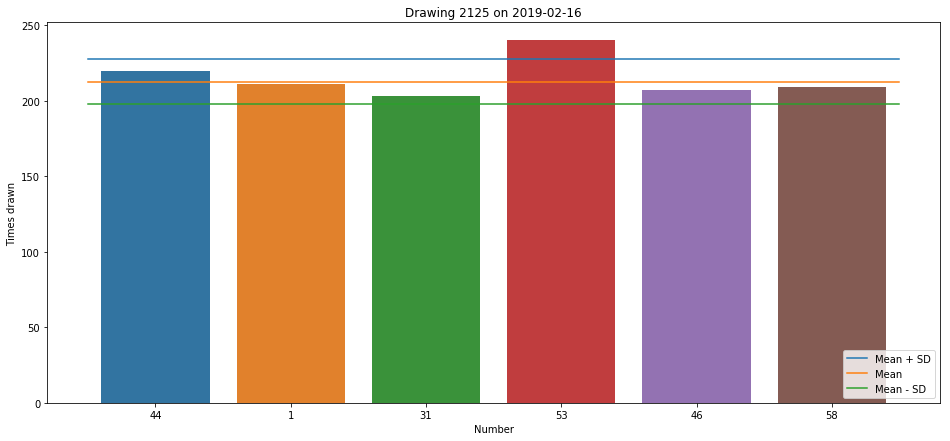





>>> Drawing 2126 on 2019-02-20:
1st ball: 58; Drawn 209 times; In last drawing: Yes! Popularity: 23
2nd ball: 39; Drawn 200 times; In last drawing: No.  Popularity: 30 (bottom 10)
3rd ball: 27; Drawn 224 times; In last drawing: No.  Popularity: 10 (top 10)
4th ball: 07; Drawn 200 times; In last drawing: No.  Popularity: 30 (bottom 10)
5th ball: 24; Drawn 229 times; In last drawing: No.  Popularity:  7 (top 10)
6th ball: 12; Drawn 213 times; In last drawing: No.  Popularity: 19


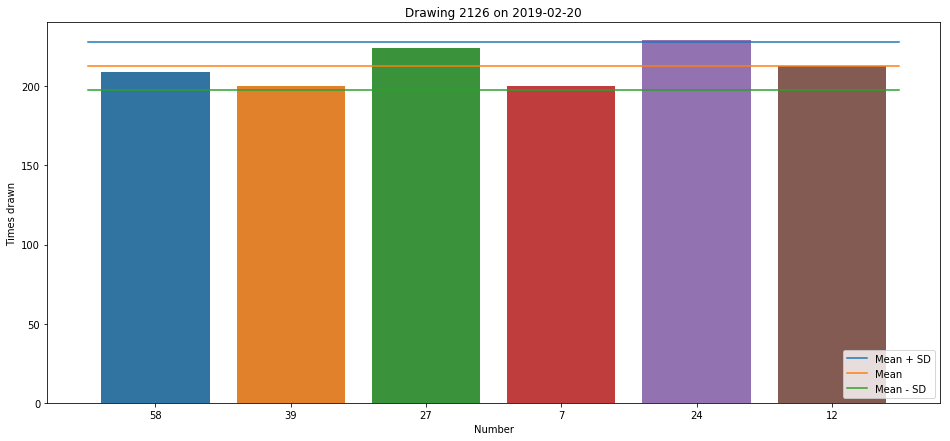





>>> Drawing 2127 on 2019-02-23:
1st ball: 07; Drawn 200 times; In last drawing: Yes! Popularity: 30 (bottom 10)
2nd ball: 46; Drawn 207 times; In last drawing: No.  Popularity: 25
3rd ball: 28; Drawn 222 times; In last drawing: No.  Popularity: 12
4th ball: 30; Drawn 222 times; In last drawing: No.  Popularity: 12
5th ball: 44; Drawn 220 times; In last drawing: No.  Popularity: 14
6th ball: 01; Drawn 211 times; In last drawing: No.  Popularity: 21


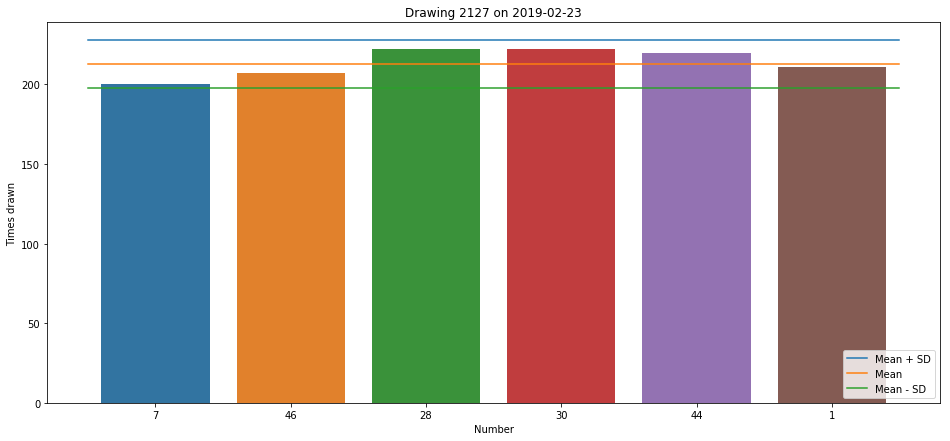

In [18]:
for i in reversed(range(1, 6)):
    print_stats(df.iloc[[-i]])
    plot_stats(df.iloc[[-i]])

### How many times a number was drawn two weeks in a row?

In [19]:
count = 0
for i in range(1, len(df)):
    last_drawing = df.iloc[(i - 1), 1:7].to_list()
    this_drawing = df.iloc[i, 1:7].to_list()
    match = False
    for num in this_drawing:
        if num in last_drawing:
            match = True
            continue
    if match:
        count += 1
print(f"A number was drawn two weeks in a row {count:,d}",
      f"out of {len(df):,d} drawings or",
      f"{count/len(df)*100:.2f}% of the times.")

A number was drawn two weeks in a row 1,026 out of 2,127 drawings or 48.24% of the times.


### This was a very controversial drawing, can you spot why?

>>> Drawing 2052 on 2018-06-23:
1st ball: 57; Drawn 193 times; In last drawing: No.  Popularity: 35 (bottom 10)
2nd ball: 50; Drawn 217 times; In last drawing: No.  Popularity: 16
3rd ball: 56; Drawn 221 times; In last drawing: No.  Popularity: 13
4th ball: 51; Drawn 227 times; In last drawing: No.  Popularity:  8 (top 10)
5th ball: 58; Drawn 209 times; In last drawing: No.  Popularity: 23
6th ball: 59; Drawn 209 times; In last drawing: No.  Popularity: 23


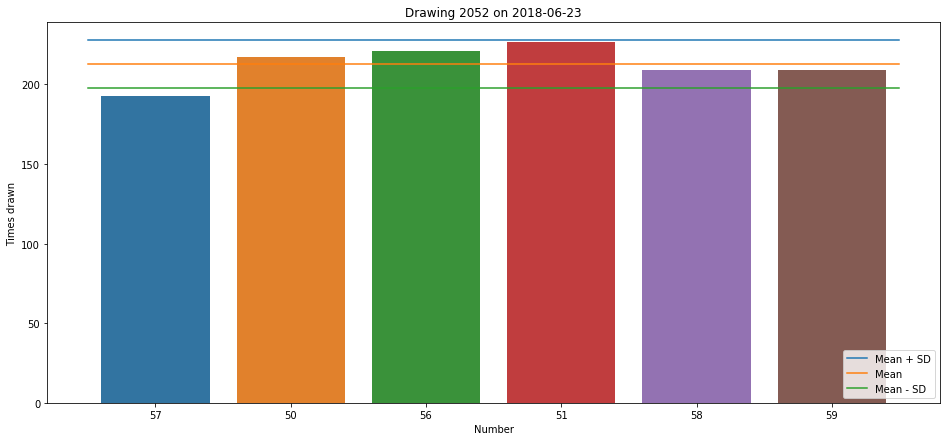

In [20]:
print_stats(df.iloc[[2051]])
plot_stats(df.iloc[[2051]])

In [21]:
# Has anything like this ever happened before?
df.loc[(df.iloc[:, 1:7].max(axis=1) - df.iloc[:, 1:7].min(axis=1)) <= 10]

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
2052,2018-06-23,57,50,56,51,58,59


### How many "birthdays" and "anniversaries" drawings, all numbers within 01 and 31, are there?

In [22]:
i = df.iloc[:, 1:7][df.iloc[:, 1:7] < 32].dropna(axis='index').index
birthday_drawings = df.iloc[i - 1]
birthday_drawings

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,
385,2002-08-07,22,12,24,18,5,16
478,2003-07-09,30,8,31,3,21,25
809,2006-10-21,25,23,11,5,30,15
992,2008-08-02,6,8,4,1,25,28
996,2008-08-16,21,23,20,7,29,15
1003,2008-09-10,10,27,23,5,16,26
1127,2009-11-18,24,8,14,5,29,30
1154,2010-02-17,4,14,21,26,12,28
1184,2010-06-02,4,23,27,28,9,30


In [23]:
print(f"""There were {len(birthday_drawings)} "birthday" games out of all {len(df):,d} drawings.""")

There were 23 "birthday" games out of all 2,127 drawings.


### How about the lazy 1, 2, 3, 4, 5, 6 game?

In [24]:
df.iloc[df.iloc[:, 1:7][df.iloc[:, 1:7] <= 6].dropna(axis='index').index - 1]

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,


### How about the "Lost" game [04, 08, 15, 16, 23, 42]?

In [25]:
df.iloc[df.iloc[:, 1:7][(df.iloc[:, 1:7] ==  4) |
                        (df.iloc[:, 1:7] ==  8) |
                        (df.iloc[:, 1:7] == 15) |
                        (df.iloc[:, 1:7] == 16) |
                        (df.iloc[:, 1:7] == 23) |
                        (df.iloc[:, 1:7] == 42)].dropna(axis='index').index - 1]

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,


### Was there ever a repeated game?

In [26]:
len(df.iloc[:, 1:7]) != len(df.iloc[:, 1:7].drop_duplicates())

False

In [27]:
df.loc[df.index.value_counts(dropna=False) > 1]

,Date,1st ball,2nd ball,3rd ball,4th ball,5th ball,6th ball
Drawing,,,,,,,


## Conclusions

* Lottery statistics are interesting and fun to analyze!


* Future drawings **cannot** be predicted since they have no correlation with previous drawings.


* The odds are against those who bet only on birthdays and anniversaries, the first 31 numbers, and forget about the other half.


* Mega-Sena is a *high risk* investment because you could potentially loose everything you *invest*, yet it is usually *low damage*, since the most popular six numbers game costs about one dollar. Usually there is also the option to participate on pools at the lottery house for seven or more numbers games that have a bigger chances of winning.


* Many people agree with `"If anyone gives you 10,000 to 1 odds on anything, you take that bet" Malone, Kevin` and bet about one dollar for *teeny tiny* chance of winning millions every week, do you?